 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [189]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [190]:
# Reading whale returns
whale_returns = Path("/Users/prsm/Desktop/Fintech/Projects/Mod4 - Whale analysis/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [191]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [192]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [193]:
whale_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [194]:
# Reading algorithmic returns
algo_returns = Path("/Users/prsm/Desktop/Fintech/Projects/Mod4 - Whale analysis/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [195]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [196]:
# Drop nulls
algo_returns = whale_returns.dropna()
algo_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [197]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = Path("/Users/prsm/Desktop/Fintech/Projects/Mod4 - Whale analysis/Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [198]:
sp_tsx_history.tail()

,Close
Date,
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"
2019-12-27,"$17,168.21"
2019-12-30,"$17,098.56"


In [199]:
# Check Data Types
sp_tsx_history["Close"].dtype

dtype('O')

In [200]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "").astype(float)
sp_tsx_history.head(10)


/var/folders/6d/hqjy9q1s52z5b3nyzz73wbkm0000gn/T/ipykernel_41948/2894438886.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


In [201]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [202]:
sp_tsx_returns.tail()

,Close
Date,
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003
2019-12-27,-0.000695
2019-12-30,-0.004057


In [203]:
sp_tsx_returns.isnull().sum()

Close    1
dtype: int64

In [204]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna().copy()
sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [205]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.columns = ["S&P TSK ALGO"]
sp_tsx_returns.head()

,S&P TSK ALGO
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [206]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSK ALGO
Date,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,0.002230,0.003241,-0.002534,0.004213,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.004016,0.004076,0.002355,0.006726,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.000582,0.004225,0.005843,-0.001652,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

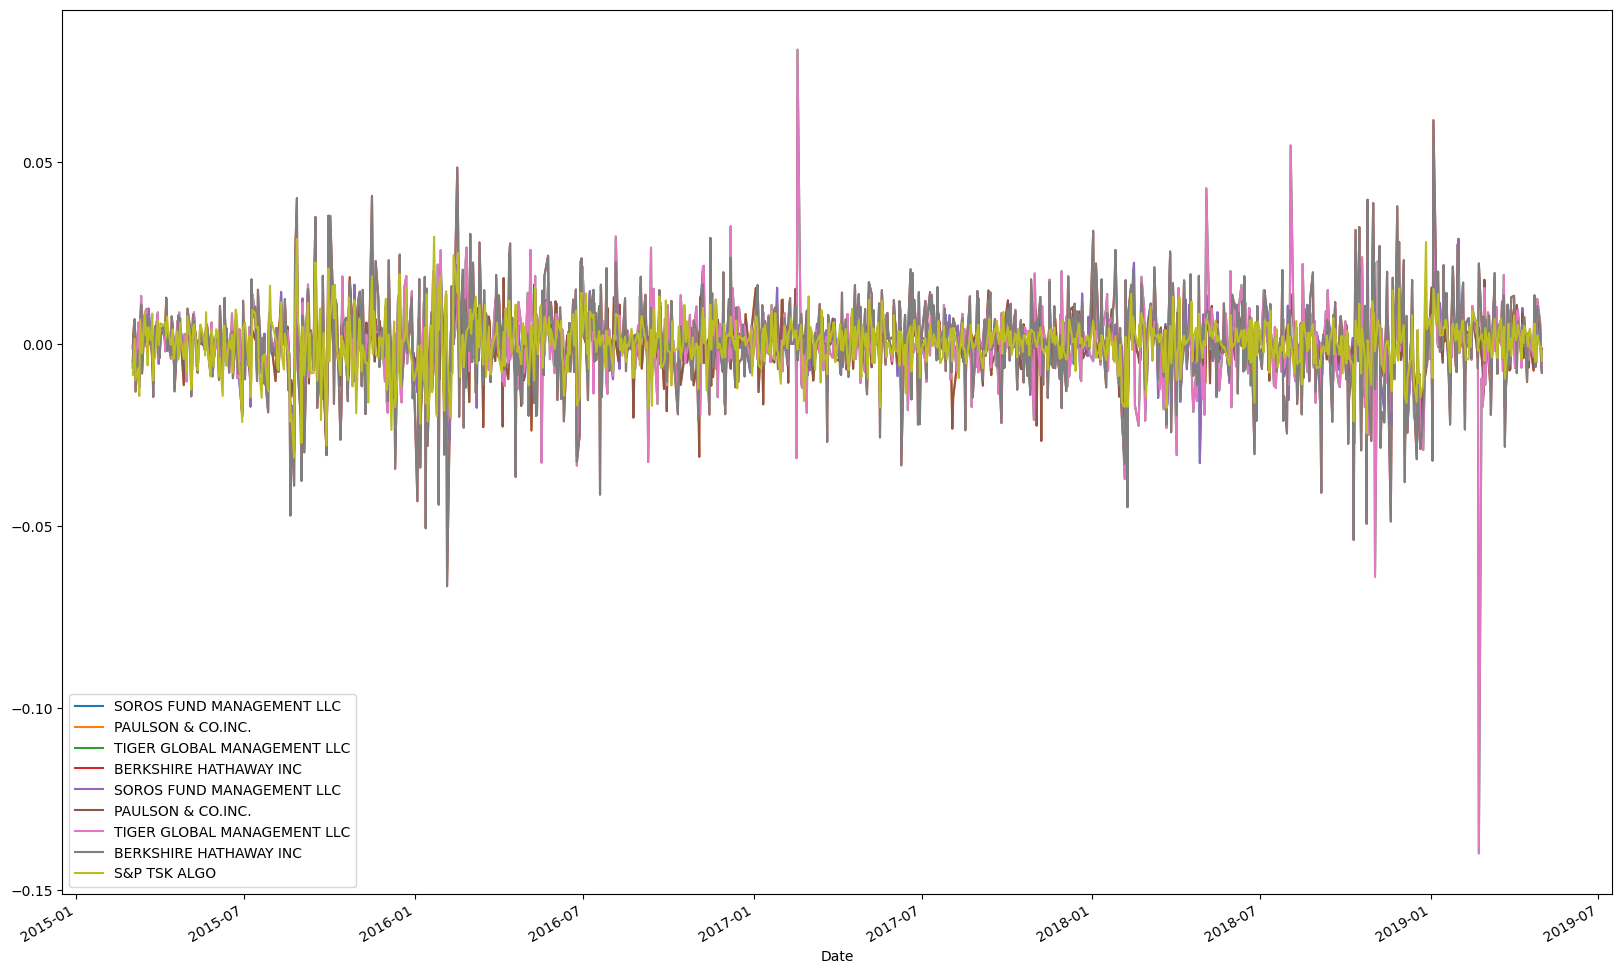

In [207]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,13))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

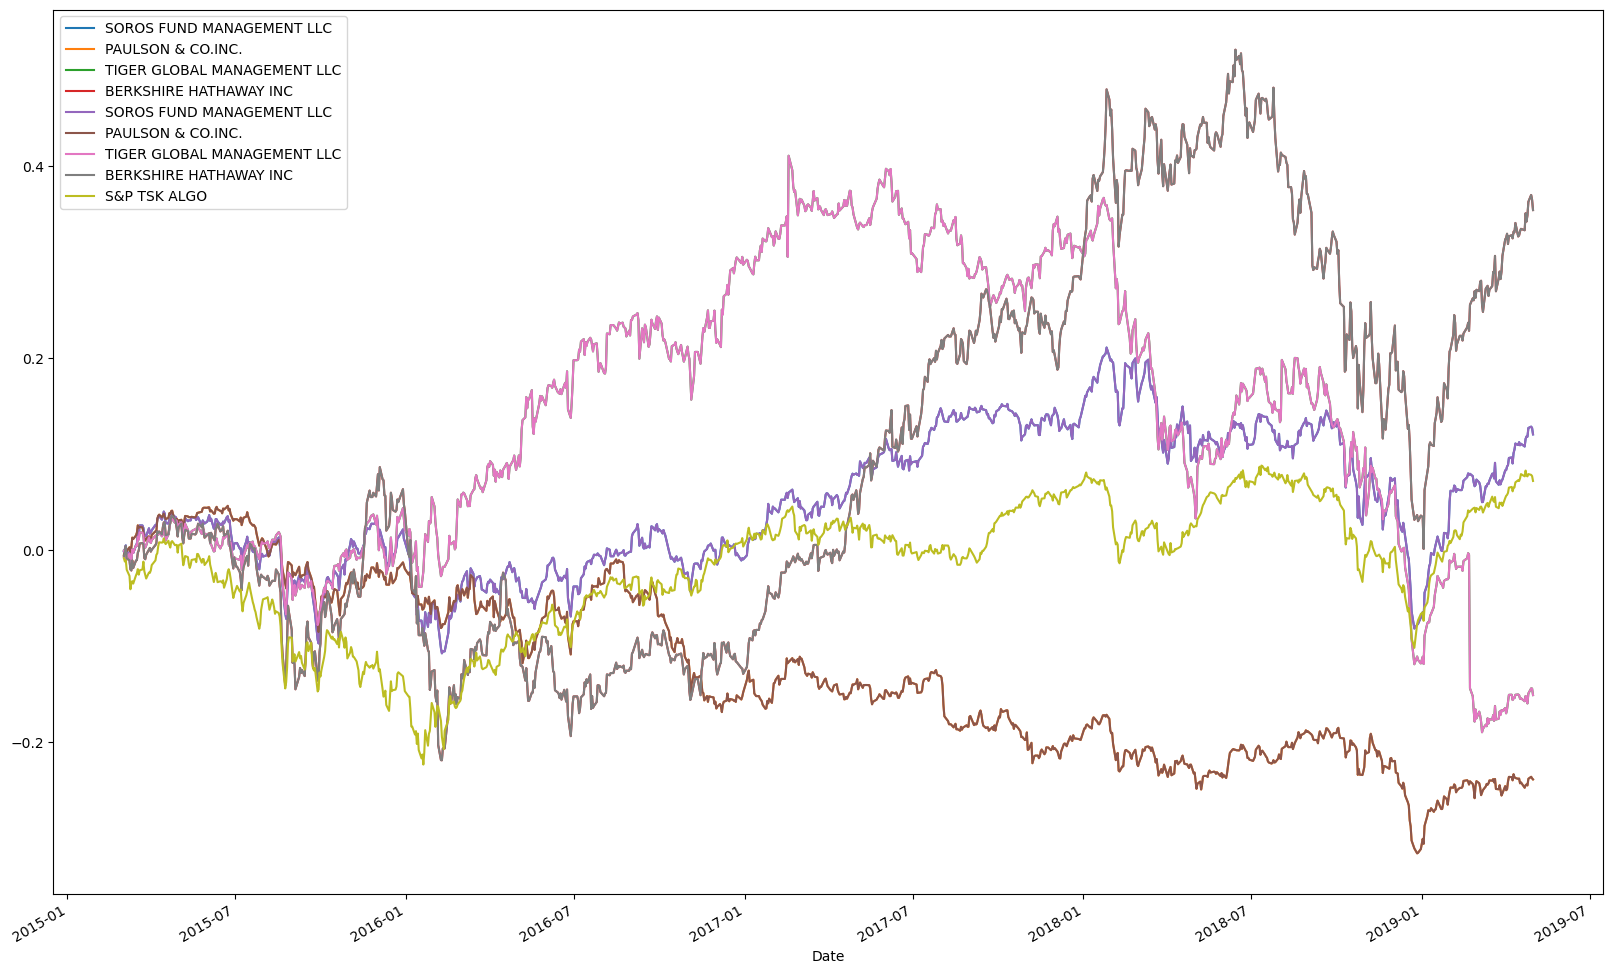

In [208]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,13))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

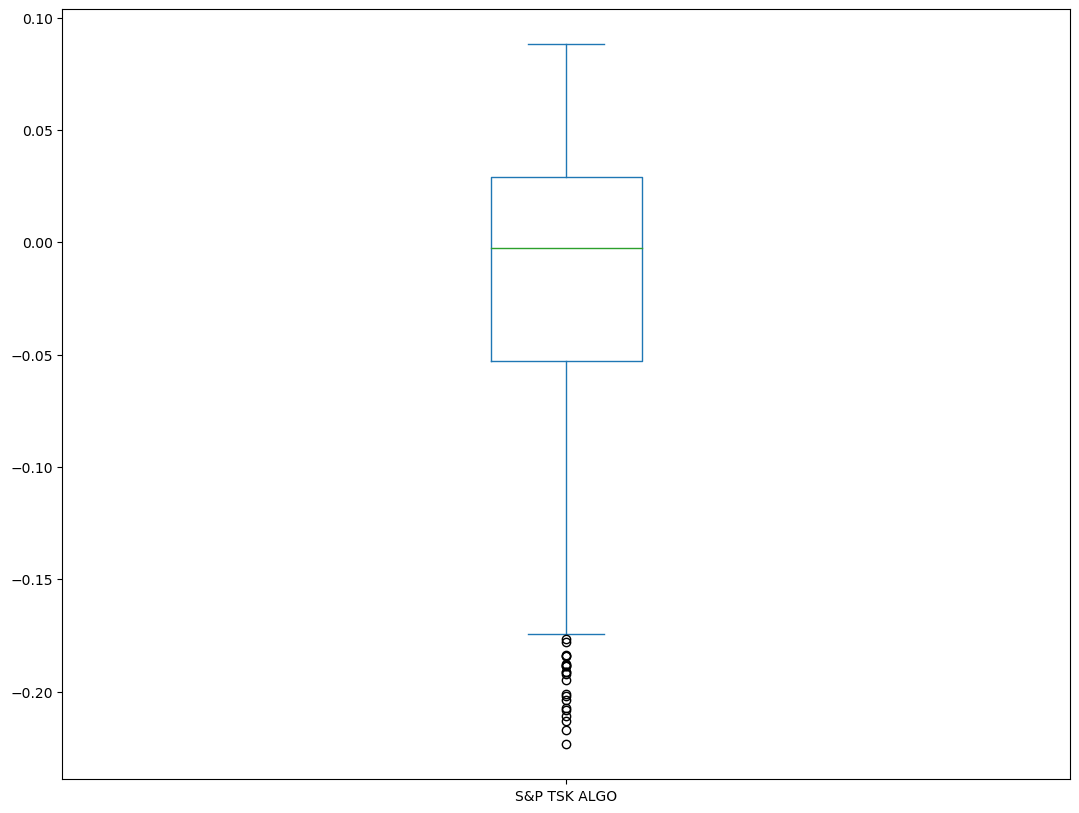

In [233]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(13,10))
#I tried few things but can't find the mistake why it's only showing one candle #

### Calculate Standard Deviations

In [210]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns.std()
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.007805
PAULSON & CO.INC.              0.006962
TIGER GLOBAL MANAGEMENT LLC    0.010851
BERKSHIRE HATHAWAY INC         0.012788
SOROS FUND MANAGEMENT LLC      0.007805
PAULSON & CO.INC.              0.006962
TIGER GLOBAL MANAGEMENT LLC    0.010851
BERKSHIRE HATHAWAY INC         0.012788
S&P TSK ALGO                   0.007036
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [230]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_returns_std = sp_tsx_returns.std().mean()
sp_tsx_returns_std
# Determine which portfolios are riskier than the S&P TSX 60
#PAULSON & CO.INC. At 0.006962 comparing to S&P TSX 60

0.006637362556692504

### Calculate the Annualized Standard Deviation

In [212]:
# Calculate the annualized standard deviation (252 trading days)
combined_returns_std = combined_returns_std * np.sqrt(252)
combined_returns_std

BERKSHIRE HATHAWAY INC         0.203008
BERKSHIRE HATHAWAY INC         0.203008
TIGER GLOBAL MANAGEMENT LLC    0.172257
TIGER GLOBAL MANAGEMENT LLC    0.172257
SOROS FUND MANAGEMENT LLC      0.123898
SOROS FUND MANAGEMENT LLC      0.123898
S&P TSK ALGO                   0.111691
PAULSON & CO.INC.              0.110519
PAULSON & CO.INC.              0.110519
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

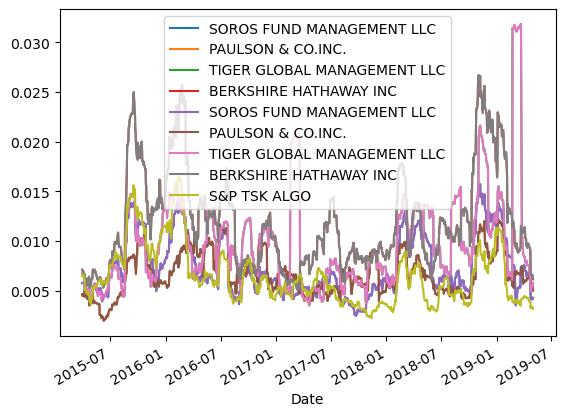

In [213]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns_roll = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
returns_roll.plot()

### Calculate and plot the correlation

In [220]:
# Calculate the correlation
correlation_cal = combined_returns.corr()
correlation_cal

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSK ALGO
SOROS FUND MANAGEMENT LLC,1.000000,0.697069,0.560962,0.750181,1.000000,0.697069,0.560962,0.750181,0.671796
PAULSON & CO.INC.,0.697069,1.000000,0.433034,0.540024,0.697069,1.000000,0.433034,0.540024,0.485006
TIGER GLOBAL MANAGEMENT LLC,0.560962,0.433034,1.000000,0.423521,0.560962,0.433034,1.000000,0.423521,0.439204
BERKSHIRE HATHAWAY INC,0.750181,0.540024,0.423521,1.000000,0.750181,0.540024,0.423521,1.000000,0.555474
SOROS FUND MANAGEMENT LLC,1.000000,0.697069,0.560962,0.750181,1.000000,0.697069,0.560962,0.750181,0.671796
PAULSON & CO.INC.,0.697069,1.000000,0.433034,0.540024,0.697069,1.000000,0.433034,0.540024,0.485006
TIGER GLOBAL MANAGEMENT LLC,0.560962,0.433034,1.000000,0.423521,0.560962,0.433034,1.000000,0.423521,0.439204
BERKSHIRE HATHAWAY INC,0.750181,0.540024,0.423521,1.000000,0.750181,0.540024,0.423521,1.000000,0.555474
S&P TSK ALGO,0.671796,0.485006,0.439204,0.555474,0.671796,0.485006,0.439204,0.555474,1.000000


<AxesSubplot:>

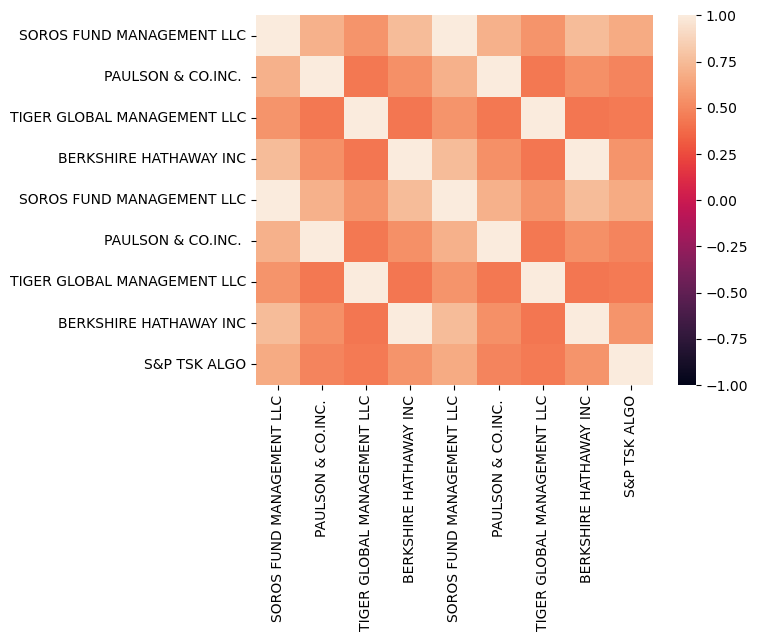

In [221]:
# Display de correlation matrix
sns.heatmap(correlation_cal, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [252]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P TSX
variance = sp_tsx_returns.rolling(window=13).var()
variance

,S&P TSK ALGO
Date,
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
2012-10-09,NaN
...,...
2019-12-20,0.000009
2019-12-23,0.000009
2019-12-24,0.000009


In [ ]:
# Computing beta


In [ ]:
# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

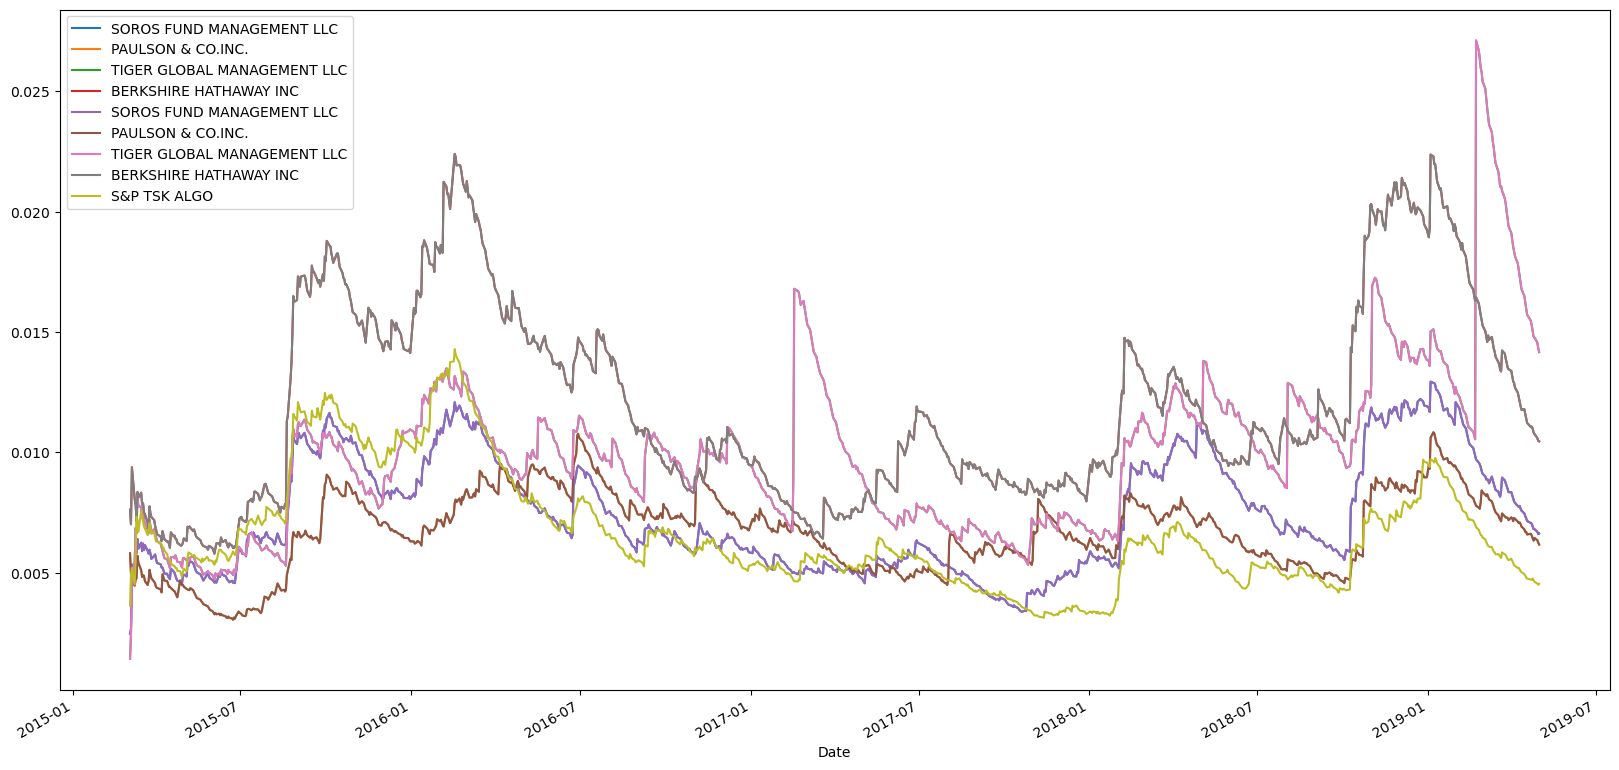

In [257]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [259]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns.mean()*252) / (combined_returns.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.285877
PAULSON & CO.INC.             -0.546004
TIGER GLOBAL MANAGEMENT LLC   -0.144036
BERKSHIRE HATHAWAY INC         0.465690
SOROS FUND MANAGEMENT LLC      0.285877
PAULSON & CO.INC.             -0.546004
TIGER GLOBAL MANAGEMENT LLC   -0.144036
BERKSHIRE HATHAWAY INC         0.465690
S&P TSK ALGO                   0.207582
dtype: float64

<AxesSubplot:>

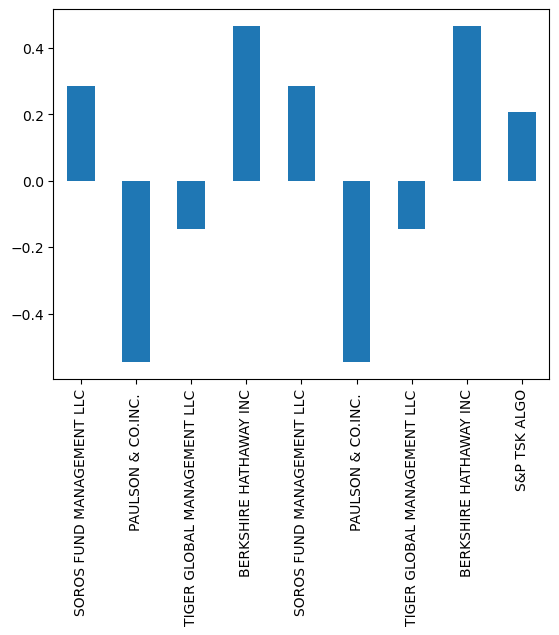

In [261]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [285]:
# Reading data from 1st stock
i_historical= ("/Users/prsm/Desktop/Fintech/Projects/Mod4 - Whale analysis/Resources/l_historical.csv")
i_historical = pd.read_csv(i_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
i_historical

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [286]:
# Reading data from 2nd stock
otex_historical= ("/Users/prsm/Desktop/Fintech/Projects/Mod4 - Whale analysis/Resources/otex_historical.csv")
otex_historical = pd.read_csv(otex_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [287]:
# Reading data from 3rd stock
shop_historical= ("/Users/prsm/Desktop/Fintech/Projects/Mod4 - Whale analysis/Resources/shop_historical.csv")
shop_historical = pd.read_csv(shop_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [306]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([shop_historical,otex_historical,i_historical], axis = "columns", join = "inner")
all_stocks.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [332]:
# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,index,Date,Close,Close,Close
0,0,2018-01-02,132.06,43.58,57.99
1,1,2018-01-03,135.15,43.07,57.41
2,2,2018-01-04,137.46,42.91,57.42
3,3,2018-01-05,137.26,42.57,57.42
4,4,2018-01-08,139.51,42.16,56.86


In [341]:
# Reorganize portfolio data by having a column per symbol
all_stocks = combined_returns.drop
all_stocks

<bound method DataFrame.drop of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  \
Date                                                              
2015-03-03                    -0.000496 

In [345]:
# Drop Nas
combined_returns = combined_returns.dropna().copy()

In [368]:
# Calculate daily returns
# Display sample data
combined_returns.head()

Date
2015-03-03   -0.035150
2015-03-04    0.010930
2015-03-05    0.035690
2015-03-06   -0.076089
2015-03-09    0.011441
dtype: float64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [378]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
all_stocks_returns = cumulative_returns.sum(axis=1)

# Display sample data
all_stocks_returns.head()

Date
2015-03-03   -0.035150
2015-03-04   -0.024282
2015-03-05    0.011339
2015-03-06   -0.064843
2015-03-09   -0.053360
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [392]:
# Join your returns DataFrame to the original returns DataFrame


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [407]:
# Calculate the annualized `std`
annual_combined_returns_std = combined_returns_std.sort_values(ascending = True)
annual_combined_returns_std

PAULSON & CO.INC.              0.110519
PAULSON & CO.INC.              0.110519
S&P TSK ALGO                   0.111691
SOROS FUND MANAGEMENT LLC      0.123898
SOROS FUND MANAGEMENT LLC      0.123898
TIGER GLOBAL MANAGEMENT LLC    0.172257
TIGER GLOBAL MANAGEMENT LLC    0.172257
BERKSHIRE HATHAWAY INC         0.203008
BERKSHIRE HATHAWAY INC         0.203008
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [452]:
# CHART NOT SHOWING 

<AxesSubplot:>

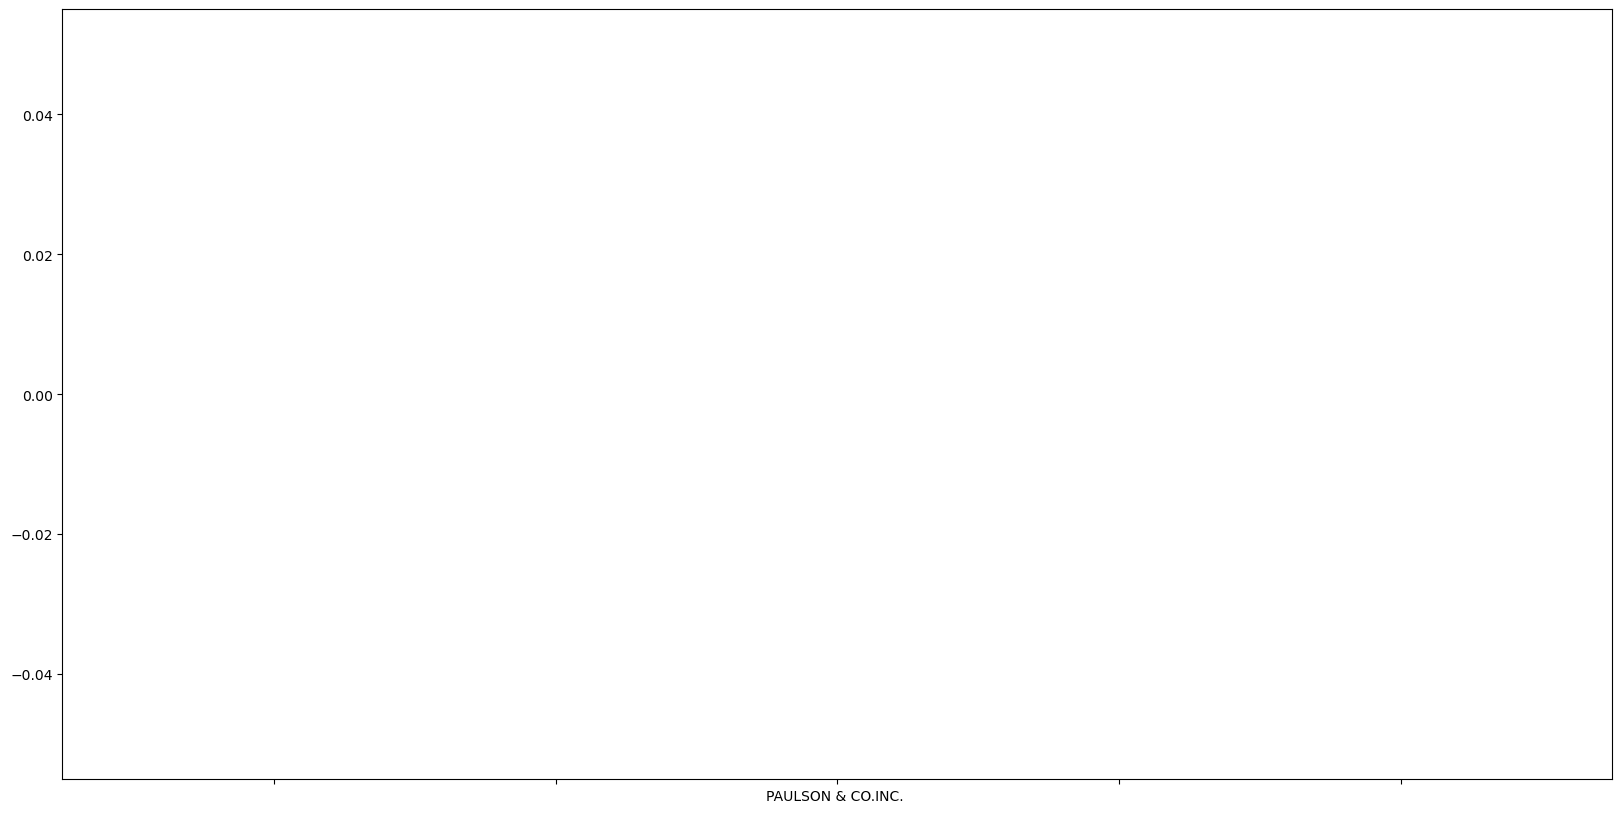

In [470]:
# Calculate rolling standard deviation
combined_returns_std21 = combined_returns.rolling(window=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation
combined_returns_std21

<AxesSubplot:>

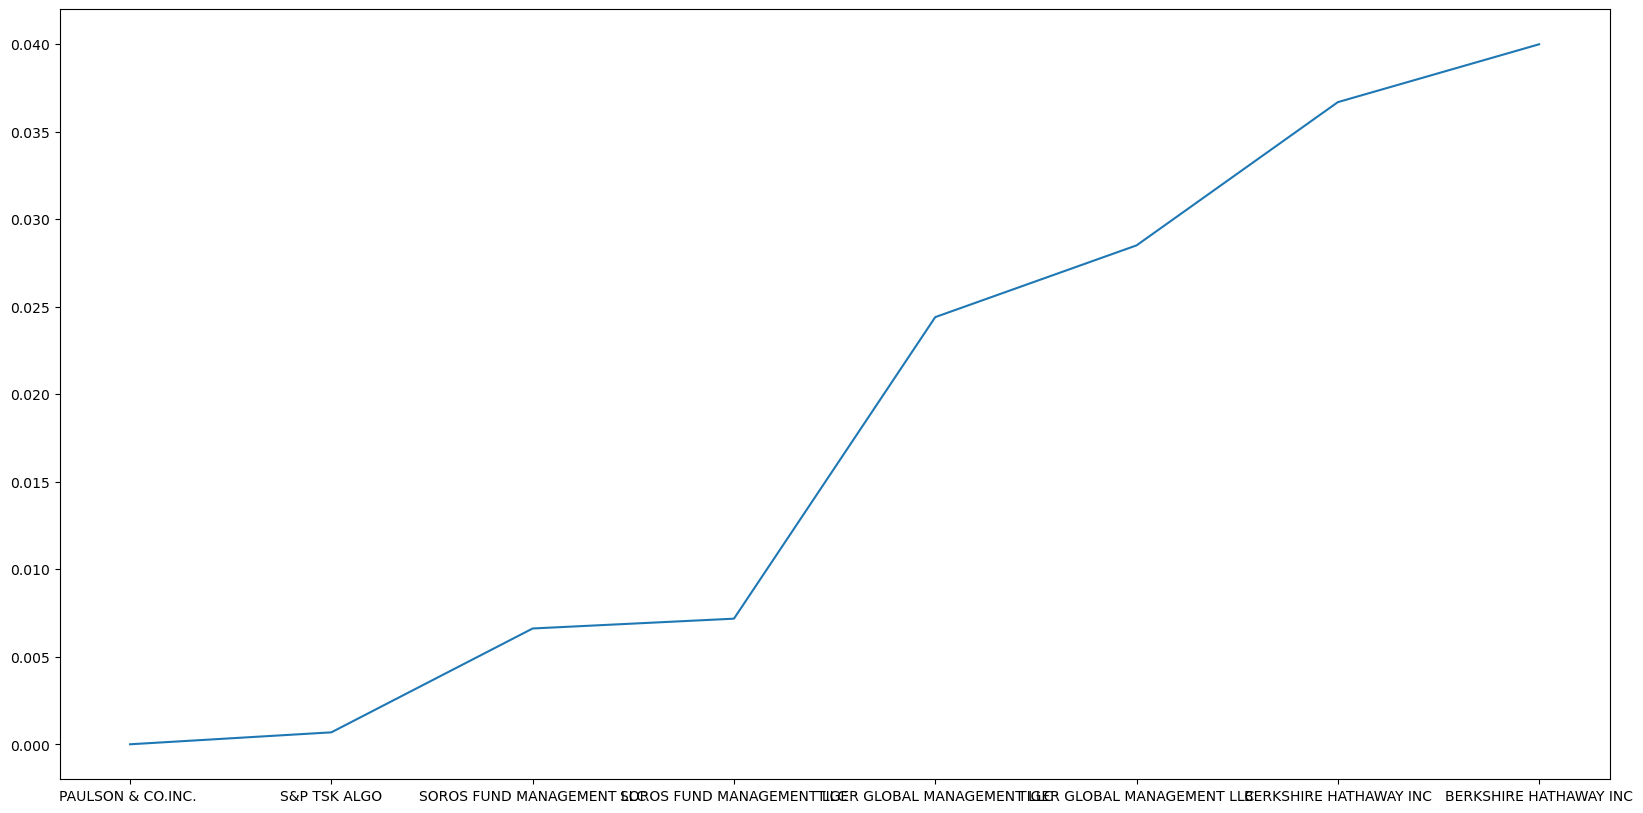

In [451]:
# Calculate rolling standard deviation
annual_combined_returns21_std = combined_returns.ewm(halflife=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation
annual_combined_returns21_std

In [ ]:
# ONLY SHWOING ONE LINE!

### Calculate and plot the correlation

In [479]:
# Calculate and plot the correlation
corre_cal_returns = combined_returns.corr()
corre_call_retuns

TypeError: corr() missing 1 required positional argument: 'other'

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!